In [1]:
import sys
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
#X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
#X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
#Y_train = np_utils.to_categorical(Y_train)
#Y_test = np_utils.to_categorical(Y_test)
###

In [5]:
input_shape = (28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


#num_classes = 10


Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
#input data 가시화
df_data=mnist.load_data()


In [7]:
print(X_train.shape)
print(Y_train.shape)
#Y_train.head()

(60000, 28, 28, 1)
(60000, 10)


In [9]:
#model = Sequential()
#model.add(Dense(units=64, input_dim=28*28, activation='relu'))
#model.add(Dense(units=10, activation='softmax'))


In [19]:
#CNN 구현
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                401472    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
___________________________

In [20]:
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.fit(X_train, Y_train, epochs=5, batch_size=32)

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
                 batch_size=128,
                 epochs=50,
                 verbose=1, 
                 validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.3858 - acc: 0.8835 - val_loss: 0.0850 - val_acc: 0.9731
Epoch 2/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1564 - acc: 0.9537 - val_loss: 0.0578 - val_acc: 0.9813
Epoch 3/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1219 - acc: 0.9641 - val_loss: 0.0487 - val_acc: 0.9839
Epoch 4/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1064 - acc: 0.9690 - val_loss: 0.0418 - val_acc: 0.9860
Epoch 5/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0924 - acc: 0.9728 - val_loss: 0.0411 - val_acc: 0.9861
Epoch 6/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0830 - acc: 0.9744 - val_loss: 0.0390 - val_acc: 0.9865
Epoch 7/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0762 - acc: 0.9767 - val_loss: 0.0371 - val_acc

In [22]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

10000/10000 [==============================] - 0s 42us/step


In [23]:
print('loss_and_metrics : ' + str(loss_and_metrics))

loss_and_metrics : [0.03953153069320342, 0.9909]


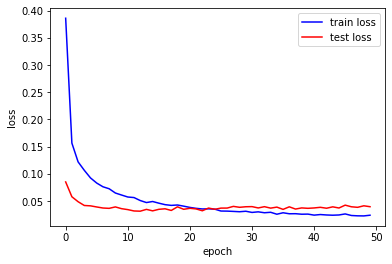

In [24]:
#loss graph 그리기

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'b', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper right')

plt.show()

In [ ]:
#모델 Export 와 활용